# CSC 251 Project 3: Housing Market Analysis

**Student:** Frank Lin  
**Date:** November 20, 2025  
**Project:** Project 3 - Housing Market Analysis

## Project Description
This project analyzes the increase in housing costs over the last 25 years and compares it with rental costs, college tuition, and the Consumer Price Index using datasets from Zillow, the US DoE and the US BLS.

## Import Libraries

In [161]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## 1. Zillow Home Value Index (ZHVI) Data

The ZHVI dataset contains average home prices for mid-range homes (35th to 65th percentile) in hundreds of US metropolitan areas from 2000 to early 2025. We'll analyze three markets:
- **Raleigh, NC** - A growing tech hub and university city in the Research Triangle
- **Greensboro, NC** - A mid-sized NC city with manufacturing and education sectors
- **New York, NY** - The largest US metropolitan area with historically high housing costs, chosen to contrast with NC markets

In [162]:
# Load ZHVI housing data
zhvi_raw = pd.read_csv('Metro_zhvi_homes_smoothed_2025.csv')
display(f"ZHVI shape: {zhvi_raw.shape}")
zhvi_raw.head()

'ZHVI shape: (895, 307)'

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23,9/30/23,10/31/23,11/30/23,12/31/23,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
0,102001,0,United States,country,NaN,120187.2913,120398.7393,120660.9659,121223.3906,121870.6739,122564.6489,123299.7043,124093.1250,124918.4235,125746.8653,126571.3400,127396.9282,128154.7710,128825.9244,129473.2625,130173.1789,130928.4957,131703.4344,132500.8181,133333.8454,134174.3040,135011.1513,135791.1361,136522.3873,137169.1122,137787.6911,138418.3046,139104.3875,139862.1791,140683.0181,141582.9000,142543.6761,143517.2307,144489.3136,145415.1552,146316.4892,147132.1511,147912.6231,148692.6726,149541.8982,150476.2642,151445.5815,152465.6480,153549.0573,154695.4644,155852.3076,156928.0459,157939.6059,158905.3952,159937.1681,161075.4762,162348.0089,163780.9394,165341.4583,167023.0634,168728.8611,170413.0582,172026.9994,173541.8027,175034.1816,176478.1678,177951.4175,179471.1770,181183.2466,183001.9649,184906.9037,186826.0400,188767.2445,190676.2448,192484.3338,194134.9285,195626.3280,196903.4743,198089.5624,199284.1965,200567.8004,201834.7175,202952.1275,203827.6080,204501.1544,204942.1814,205253.6326,205416.8552,205515.3475,205551.7582,205590.5172,205618.4831,205646.9573,205556.2167,205295.5035,204811.1856,204239.1662,203555.9603,202822.1367,201941.2091,201011.6920,199945.2098,198770.4863,197449.7509,196024.0165,194541.2593,192981.7210,191322.1187,189481.7057,187619.4895,185801.8053,184023.1176,182260.2896,180540.4756,179074.0361,177729.1512,176461.7048,175180.1758,173973.0139,172879.7101,171868.3916,170939.1992,170180.0248,16975

In [163]:
# Filter for our three markets: Raleigh, Greensboro, and New York
markets = ['Raleigh, NC', 'Greensboro, NC', 'New York, NY']
zhvi_filtered = zhvi_raw[zhvi_raw['RegionName'].isin(markets)].copy()

# Set RegionName as index and transpose to have dates as rows
zhvi_filtered = zhvi_filtered.set_index('RegionName')
# Keep only date columns
date_cols = zhvi_filtered.columns[4:]
zhvi = zhvi_filtered[date_cols].T

# Convert index to datetime
zhvi.index = pd.to_datetime(zhvi.index)
zhvi.columns = markets

# Remove any rows with missing values
zhvi = zhvi.dropna()

print(f"Cleaned ZHVI shape: {zhvi.shape}")
print(f"Date range: {zhvi.index.min()} to {zhvi.index.max()}")
zhvi.head()

Cleaned ZHVI shape: (302, 3)
Date range: 2000-01-31 00:00:00 to 2025-02-28 00:00:00


,"Raleigh, NC","Greensboro, NC","New York, NY"
2000-01-31,215997.9795,170811.5101,106754.9099
2000-02-29,216915.8491,170877.3616,106941.3279
2000-03-31,217842.2198,171175.0692,107091.6748
2000-04-30,219719.4052,171736.3453,107449.9066
2000-05-31,221663.2957,172557.4677,107807.8454


## 2. College Tuition Data

This dataset contains average undergraduate education costs for all public and private US institutions. We'll be focusing on tuition and required fees in current dollars.

In [164]:
# Load college tuition data (tab-delimited)
tuition_raw = pd.read_csv('college_tuition_data.tsv', sep='\t')
display(f"tuition shape: {tuition_raw.shape}")
tuition_raw.head()

'tuition shape: (56, 25)'

,Year,All,4-Year,2-Year,All.1,4-Year.1,2-Year.1,All.2,4-Year.2,2-Year.2,All.3,4-Year.3,2-Year.3,All.4,4-Year.4,2-Year.4,All.5,4-Year.5,2-Year.5,All.6,4-Year.6,2-Year.6,All.7,4-Year.7,2-Year.7
0,1963-64,1248,1286,775,508,553,171,282,279,209,457,455,395,12126,12497,7535,4939,5369,1664,2743,2707,2032,4444,4421,3839
1,1968-69,1459,1545,1053,596,683,250,360,360,327,502,502,476,12256,12984,8847,5011,5741,2104,3027,3026,2747,4218,4217,3997
2,1969-70,1560,1674,1089,645,755,247,389,392,347,526,528,495,12376,13284,8642,5118,5990,1963,3088,3109,2752,4170,4186,3927
3,1970-71,1653,1784,1120,688,814,249,419,422,369,546,549,501,12468,13461,8452,5190,6139,1882,3160,3183,2787,4118,4139,3783
4,1971-72,1730,1878,1172,724,865,251,445,448,391,562,564,530,12603,13674,8533,5271,6302,1827,3240,3266,2847,4091,4106,3860


In [165]:
# Clean and prepare tuition data
# The first column is the academic year, second column (index 1) is "All institutions" tuition in current dollars
tuition_clean = tuition_raw[['Year', 'All']].copy()
tuition_clean.columns = ['Academic_Year', 'Tuition_and_Fees']

# Extract the starting year
tuition_clean['Year'] = tuition_clean['Academic_Year'].str[:4].astype(int)

# Create a datetime index
tuition_clean['Date'] = pd.to_datetime(tuition_clean['Year'].astype(str) + '-01-01')
tuition = tuition_clean[['Date', 'Tuition_and_Fees']].set_index('Date')

# Remove missing values
tuition = tuition.dropna()

# Filter to match time range of housing data (2000 onwards)
tuition = tuition[tuition.index >= '2000-01-01']

print(f"Cleaned tuition shape: {tuition.shape}")
print(f"Date range: {tuition.index.min()} to {tuition.index.max()}")
tuition.head()

Cleaned tuition shape: (23, 1)
Date range: 2000-01-01 00:00:00 to 2022-01-01 00:00:00


,Tuition_and_Fees
Date,
2000-01-01,10820
2001-01-01,11380
2002-01-01,12014
2003-01-01,12953
2004-01-01,13793


## 3. Zillow Observed Rent Index (ZORI) Data

The ZORI dataset contains market rental rates for properties in the 35th to 65th percentile range from 2015 to early 2025. We'll analyze the same three markets as we did for home values.

In [166]:
# Load ZORI rental data
zori_raw = pd.read_csv('Metro_zori_monthly_rentals_smoothed_2025.csv')
print(f"Original ZORI shape: {zori_raw.shape}")
zori_raw.head()

Original ZORI shape: (608, 127)


,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23,9/30/23,10/31/23,11/30/23,12/31/23,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25
0,102001,0,United States,country,NaN,1197.135014,1203.668597,1212.639047,1221.659620,1230.896254,1238.798847,1244.753920,1248.363486,1250.419375,1250.873693,1251.368173,1251.817431,1254.966815,1259.954578,1266.261236,1274.189812,1282.455613,1290.703744,1295.519096,1297.719980,1297.644693,1296.176769,1295.029494,1294.200334,1298.890739,1306.598609,1318.315378,1328.104447,1337.471629,1344.646672,1349.581747,1351.245948,1351.512371,1349.969659,1349.814946,1350.730165,1355.576826,1363.100740,1372.741546,1382.447084,1390.734015,1398.334081,1403.796555,1407.095568,1406.547956,1405.757910,1406.356303,1408.458350,1412.761634,1418.904722,1429.246007,1439.450724,1449.432443,1457.535665,1463.458136,1466.570904,1466.403371,1465.047618,1464.015811,1465.222543,1470.352121,1478.551036,1486.865719,1487.592961,1486.652710,1487.013069,1492.239732,1493.610430,1491.047981,1488.156918,1486.888040,1489.101054,1496.302718,1507.952078,1523.347496,1542.945997,1568.805864,1599.099646,1631.017777,1660.626332,1684.577855,1699.608053,1709.464112,1719.121730,1729.997455,1745.429731,1761.405633,1782.298925,1803.559602,1825.920161,1844.488372,1855.102365,1857.683820,1853.297273,1847.251529,1844.228923,1846.140492,1852.970710,1865.534347,1876.926090,1889.640253,1897.779476,1907.268194,1912.540755,1913.981395,1910.747426,1905.504898,1902.299513,1905.401603,1914.097922,1926.410529,1939.263866,1952.212690,1963.530556,1972.333743,1976.508015,1977.568303,1973.864441,1970.768273,1967.300532,1971.799915,1980.162671
1,394913,1,"New York, NY",msa,NY,2233.141451,2247.559592,2265.802262,2285.735153,2300.826521,2316.307969,2326.389177,2336.110082,2340.207945,2338.317654,2329.498444,2320.710508,2317.459707,2321.729068,2329.650287,2342.334590,2356.691511,2371.205193,2383.468073,2387.273580,2387.908284,2380.424886,2375.488288,2363.831633,2360.568209,2361.387013,2373.107635,2387.397014,2405.160717,2420.008235,2430.549216,2433.018417,2430.910794,2417.345976,2402.076866,2388.993049,2387.440714,2394.368635,2406.812247,2426.349805,2444.217603,2461.505607,2473.537688,2482.691278,2483.372243,2474.158834,2463.568991,2453.277739,2453.258764,2461.639031,2477.354633,2494.319868,2514.492504,2535.673043,2551.197037,2558.148509,2556.508651,2551.737132,2539.825654,2532.357798,2531.753020,2544.824000,2553.928425,2547.865068,2531.365390,2508.964281,2484.572235,NaN,NaN,2345.084575,2313.828864,2301.216954,2299.245376,2313.151460,2334.404545,2362.392933,2405.931505,2459.761792,2521.579349,2580.392899,2627.595751,2660.300844,2681.639179,2702.134549,2725.443336,2757.401625,2795.083018,2835.919654,2886.717526,2939.646210,2987.979072,3015.210910,3018.767458,3002.565991,2976.629318,2955.975149,2953.292320,2965.837592,2992.847893,3025.059151,3060.359940,3091.214444,3114.010621,3124.184877,3123.234629,3108.067790,3085.428589,3068.982979,3072.896968,3091.330607,3121.880300,3150.080127,3182.280631,3210.356517,3227.624815,3233.030430,3222.421335,3208.121467,3196.6713

In [167]:
# Filter for the same three markets
zori_filtered = zori_raw[zori_raw['RegionName'].isin(markets)].copy()

# Set RegionName as index and transpose
zori_filtered = zori_filtered.set_index('RegionName')
date_cols = zori_filtered.columns[4:]
zori = zori_filtered[date_cols].T

# Convert index to datetime
zori.index = pd.to_datetime(zori.index)
zori.columns = markets

# Remove missing values
zori = zori.dropna()

print(f"Cleaned ZORI shape: {zori.shape}")
print(f"Date range: {zori.index.min()} to {zori.index.max()}")
zori.head()

Cleaned ZORI shape: (120, 3)
Date range: 2015-01-31 00:00:00 to 2025-02-28 00:00:00


,"Raleigh, NC","Greensboro, NC","New York, NY"
2015-01-31,2233.141451,1089.740194,831.116940
2015-02-28,2247.559592,1092.690908,834.602713
2015-03-31,2265.802262,1100.139832,837.067482
2015-04-30,2285.735153,1105.929423,842.905435
2015-05-31,2300.826521,1117.865228,847.566280


## 4. Consumer Price Index (CPI) Data

The CPI is a measure of inflation calculated monthly from 1913 to 2024 by the US Bureau of Labor Statistics, based on prices of goods and services for urban consumers.

In [168]:
# Load CPI data
cpi_raw = pd.read_csv('cpi.csv')
display(f"CPI shape: {cpi_raw.shape}")
cpi_raw.head()

'CPI shape: (933, 2)'

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [169]:
# Clean and prepare CPI data
cpi_raw.columns = ['Date', 'CPI']
cpi_raw['Date'] = pd.to_datetime(cpi_raw['Date'])
cpi = cpi_raw.set_index('Date')

# Remove missing values
cpi = cpi.dropna()

# Filter to match time range (2000 onwards)
cpi = cpi[cpi.index >= '2000-01-01']

print(f"Cleaned CPI shape: {cpi.shape}")
print(f"Date range: {cpi.index.min()} to {cpi.index.max()}")
cpi.head()

Cleaned CPI shape: (297, 1)
Date range: 2000-01-01 00:00:00 to 2024-09-01 00:00:00


,CPI
Date,
2000-01-01,169.3
2000-02-01,170.0
2000-03-01,171.0
2000-04-01,170.9
2000-05-01,171.2


## Univariate Analysis

### Home Values Time Series

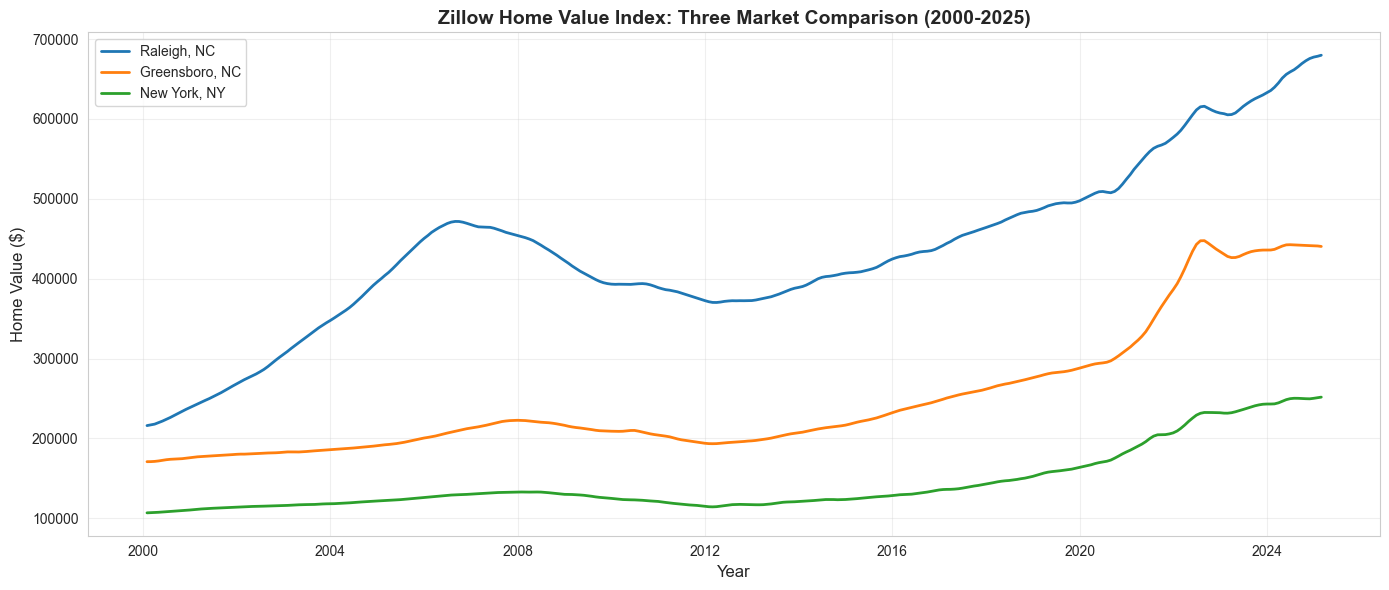


Home Value Descriptive Statistics:
         Raleigh, NC  Greensboro, NC   New York, NY
count     302.000000      302.000000     302.000000
mean   433748.388334   248987.607465  144667.351707
std    105579.492612    81331.787064   40615.329144
min    215997.979500   170811.510100  106754.909900
25%    377271.918225   195168.559950  118593.986100
50%    425230.896300   214124.116550  127565.965200
75%    483542.411975   274329.247500  150980.816575
max    679755.746400   447551.213200  251631.991300


In [170]:
# Plot home values over time
plt.figure(figsize=(14, 6))
for market in markets:
    plt.plot(zhvi.index, zhvi[market], label=market, linewidth=2)

plt.title('Zillow Home Value Index: Three Market Comparison (2000-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Home Value ($)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display descriptive statistics
print("\nHome Value Descriptive Statistics:")
print(zhvi.describe())

### Rental Rates Time Series

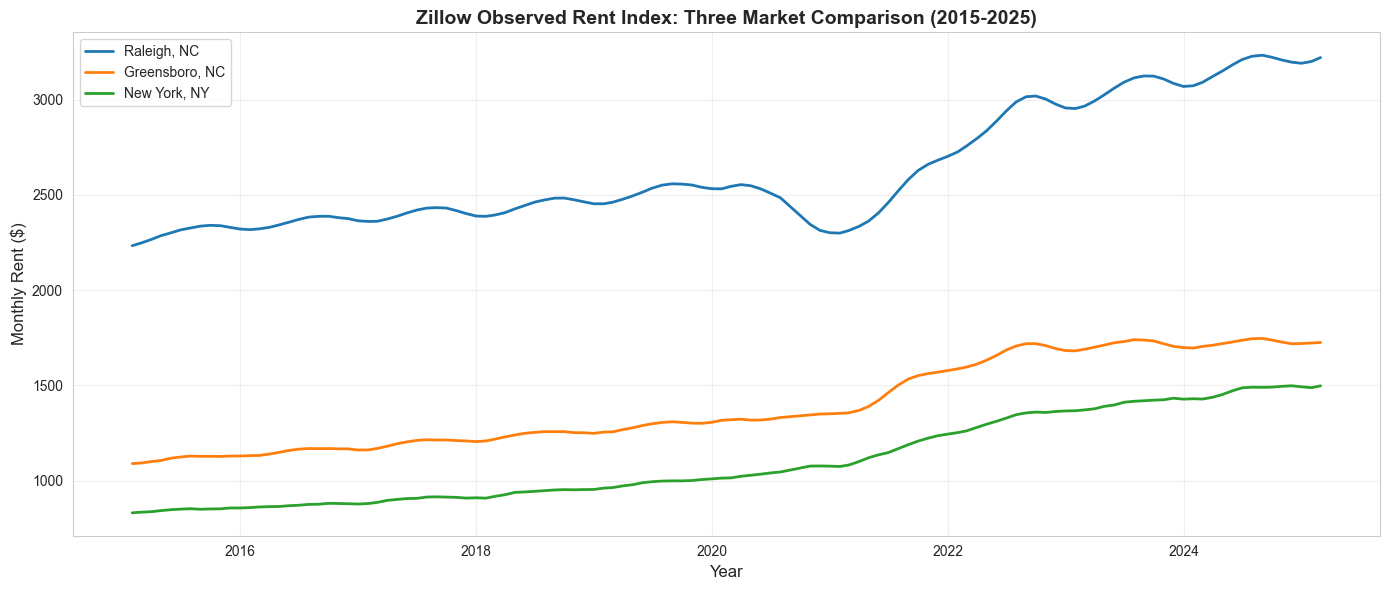


Rental Rate Descriptive Statistics:
       Raleigh, NC  Greensboro, NC  New York, NY
count   120.000000      120.000000    120.000000
mean   2625.805465     1397.588262   1103.123927
std     315.098664      231.145305    227.364222
min    2233.141451     1089.740194    831.116940
25%    2379.190736     1207.694471    908.033478
50%    2483.972239     1312.946841   1011.323615
75%    2958.440760     1686.485512   1356.116278
max    3233.030430     1746.598285   1498.114851
       Raleigh, NC  Greensboro, NC  New York, NY
count   120.000000      120.000000    120.000000
mean   2625.805465     1397.588262   1103.123927
std     315.098664      231.145305    227.364222
min    2233.141451     1089.740194    831.116940
25%    2379.190736     1207.694471    908.033478
50%    2483.972239     1312.946841   1011.323615
75%    2958.440760     1686.485512   1356.116278
max    3233.030430     1746.598285   1498.114851


In [171]:
# Plot rental rates over time
plt.figure(figsize=(14, 6))
for market in markets:
    plt.plot(zori.index, zori[market], label=market, linewidth=2)

plt.title('Zillow Observed Rent Index: Three Market Comparison (2015-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Monthly Rent ($)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display descriptive statistics
print("\nRental Rate Descriptive Statistics:")
print(zori.describe())

### College Tuition Time Series

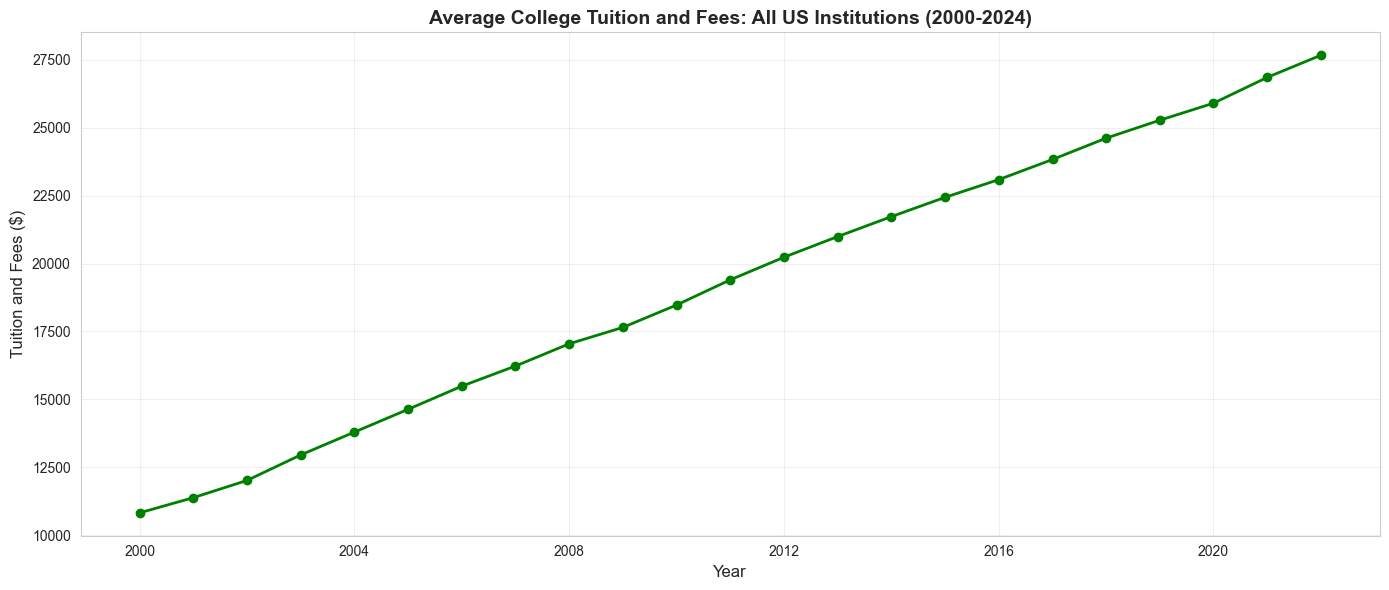


College Tuition Descriptive Statistics:
       Tuition_and_Fees
count         23.000000
mean       19240.608696
std         5230.380194
min        10820.000000
25%        15060.000000
50%        19401.000000
75%        23462.000000
max        27673.000000


In [172]:
# Plot college tuition over time
plt.figure(figsize=(14, 6))
plt.plot(tuition.index, tuition['Tuition_and_Fees'], color='green', linewidth=2, marker='o')

plt.title('Average College Tuition and Fees: All US Institutions (2000-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Tuition and Fees ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display descriptive statistics
print("\nCollege Tuition Descriptive Statistics:")
print(tuition.describe())

### Consumer Price Index Time Series

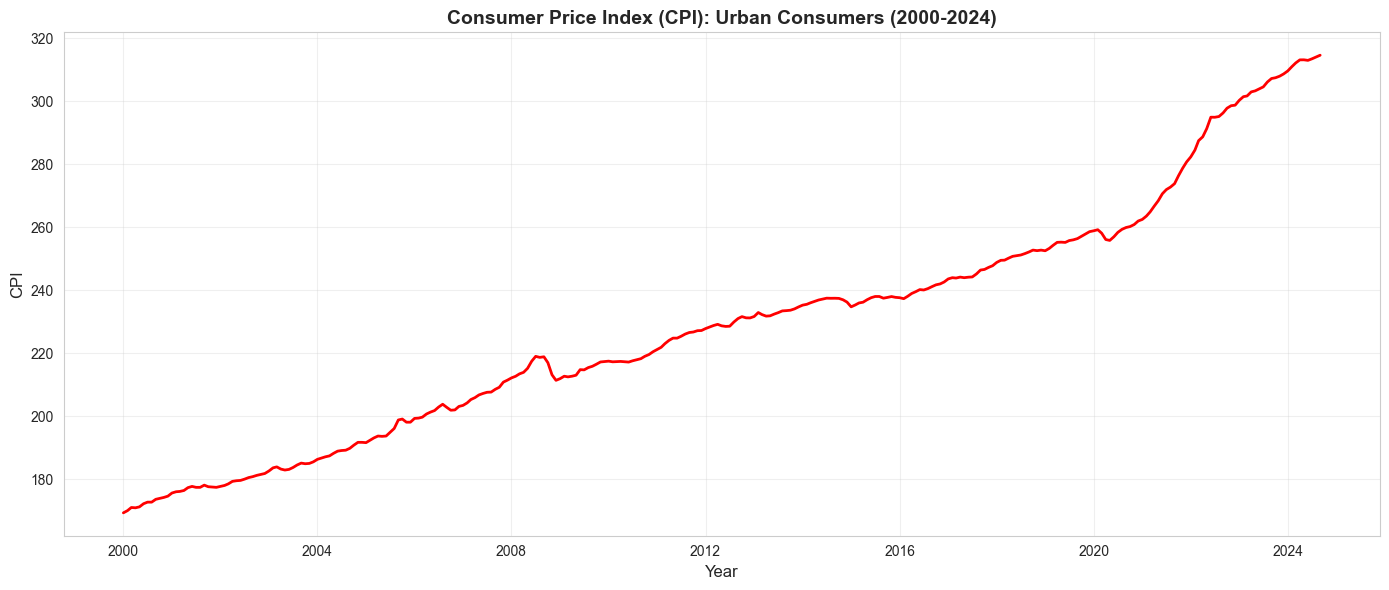


CPI Descriptive Statistics:
              CPI
count  297.000000
mean   229.043552
std     37.345611
min    169.300000
25%    199.700000
50%    228.713000
75%    251.214000
max    314.686000


In [173]:
# Plot CPI over time
plt.figure(figsize=(14, 6))
plt.plot(cpi.index, cpi['CPI'], color='red', linewidth=2)

plt.title('Consumer Price Index (CPI): Urban Consumers (2000-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display descriptive statistics
print("\nCPI Descriptive Statistics:")
print(cpi.describe())

## Bivariate Analysis

### Housing Market Comparison

Examining how the three housing markets compare in terms of growth patterns and percent changes.

In [174]:
# Calculate percent changes for home values
zhvi_pct_change = zhvi.pct_change() * 100

# Calculate average monthly percent change
avg_monthly_pct_change = zhvi_pct_change.mean()

# Calculate total percent change from start to end
total_pct_change = ((zhvi.iloc[-1] - zhvi.iloc[0]) / zhvi.iloc[0]) * 100
print("Total Percent Change in Home Values (2000-2025):")
for market in markets:
    print(f"{market}: {total_pct_change[market]:.2f}%")

Total Percent Change in Home Values (2000-2025):
Raleigh, NC: 214.70%
Greensboro, NC: 157.77%
New York, NY: 135.71%


### Rental Market Comparison

Analyzing rental rate changes across the three markets to understand affordability trends.

In [175]:
# Calculate percent changes for rental rates
zori_pct_change = zori.pct_change() * 100

# Calculate total percent change
total_pct_change_rent = ((zori.iloc[-1] - zori.iloc[0]) / zori.iloc[0]) * 100
print("Total Percent Change in Rental Rates (2015-2025):")
for market in markets:
    print(f"{market}: {total_pct_change_rent[market]:.2f}%")

Total Percent Change in Rental Rates (2015-2025):
Raleigh, NC: 44.22%
Greensboro, NC: 58.33%
New York, NY: 80.21%


### Home Values vs Rental Rates (Dual-Axis Comparison)

Dual-axis plots reveal the relationship between home prices and rental rates, showing how they move together or diverge over time.

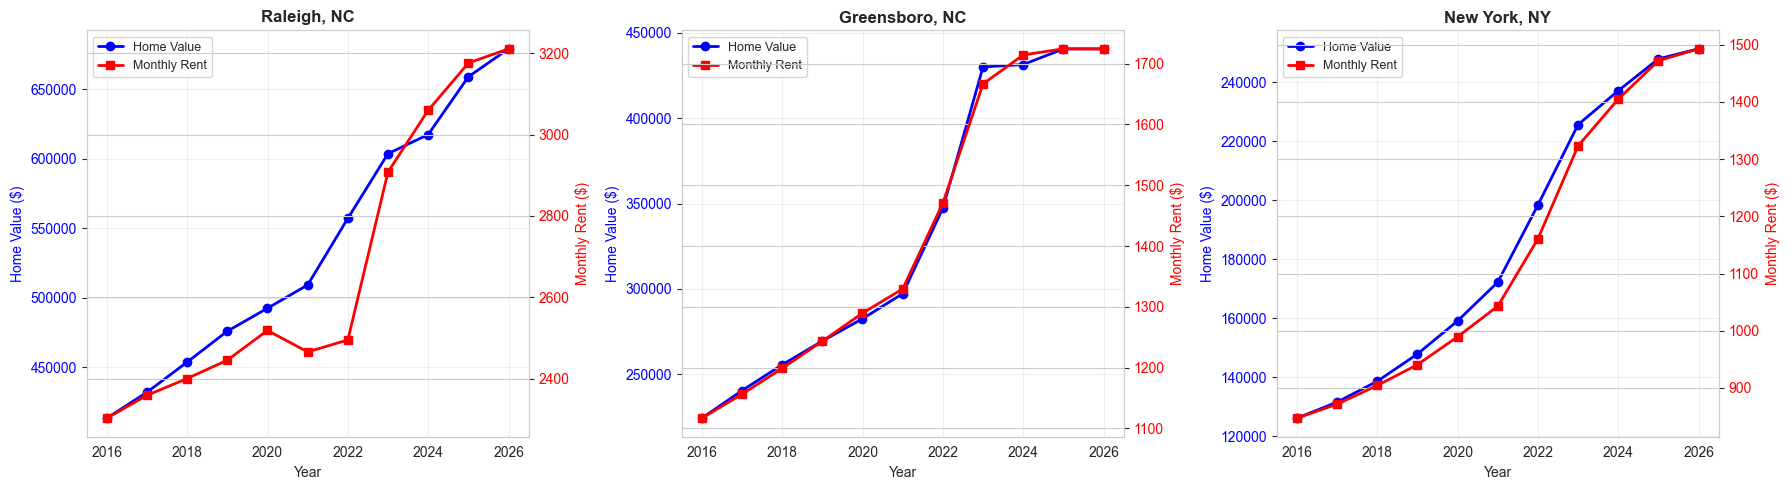

In [176]:
# Merge home values and rental data for overlapping period (2015-2025)
# Resample to common frequency (annual)
zhvi_annual = zhvi.resample('YE').mean()
zori_annual = zori.resample('YE').mean()

# Find common date range
common_dates = zhvi_annual.index.intersection(zori_annual.index)
zhvi_common = zhvi_annual.loc[common_dates]
zori_common = zori_annual.loc[common_dates]

# Create subplots for each market
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, market in enumerate(markets):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # Plot home values on left axis
    line1 = ax1.plot(zhvi_common.index, zhvi_common[market], 'b-o', label='Home Value', linewidth=2)
    ax1.set_xlabel('Year', fontsize=10)
    ax1.set_ylabel('Home Value ($)', color='b', fontsize=10)
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Plot rental rates on right axis
    line2 = ax2.plot(zori_common.index, zori_common[market], 'r-s', label='Monthly Rent', linewidth=2)
    ax2.set_ylabel('Monthly Rent ($)', color='r', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Set title
    ax1.set_title(f'{market}', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()

### Price-to-Rent Ratio Analysis

The price-to-rent ratio helps determine whether buying or renting is more economical. Ratios above 20 typically favor renting, while ratios below 15 favor buying.

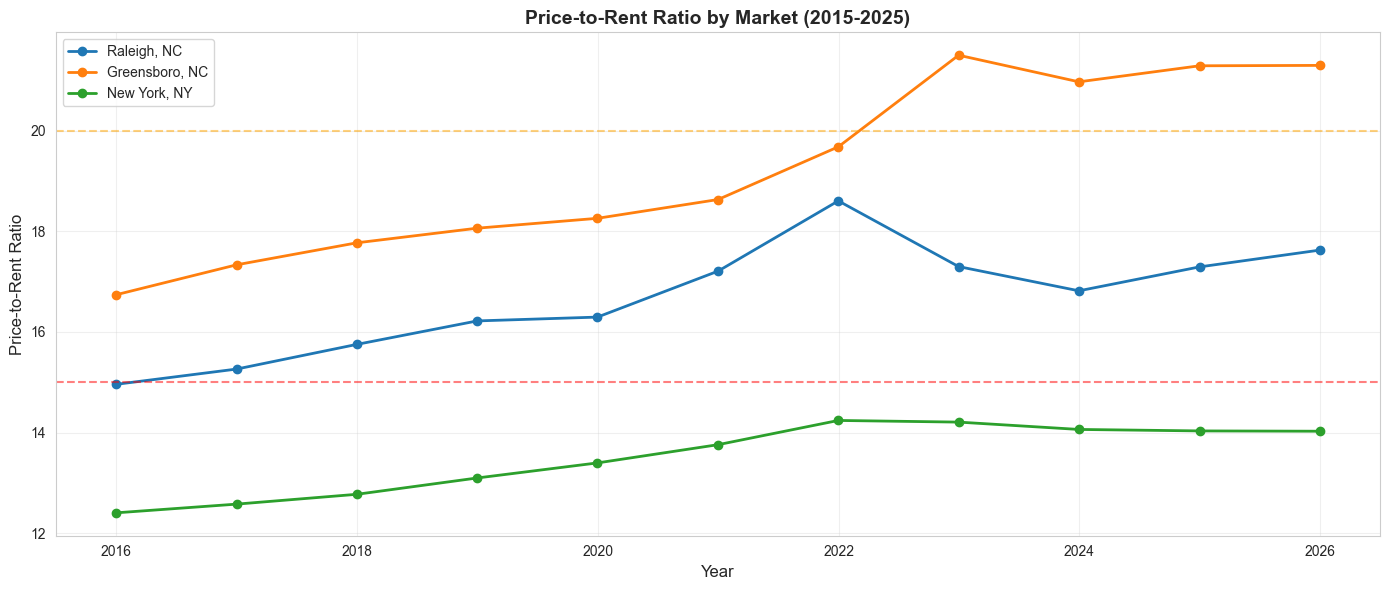


Price-to-Rent Ratio Statistics (2015-2025):
       Raleigh, NC  Greensboro, NC  New York, NY
count    11.000000       11.000000     11.000000
mean     16.667923       19.231311     13.508381
std       1.088562        1.774727      0.688833
min      14.959452       16.739585     12.405749
25%      15.986900       17.917737     12.936482
50%      16.818290       18.632763     13.760396
75%      17.296775       21.131247     14.048556
max      18.605789       21.500818     14.241985


In [177]:
# Calculate Price-to-Rent Ratio for overlapping period
# Annual home price divided by annual rent (monthly rent * 12)
price_to_rent = (zhvi_common / (zori_common * 12))

# Plot Price-to-Rent Ratio over time
plt.figure(figsize=(14, 6))
for market in markets:
    plt.plot(price_to_rent.index, price_to_rent[market], label=market, linewidth=2, marker='o')

plt.title('Price-to-Rent Ratio by Market (2015-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price-to-Rent Ratio', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(y=15, color='red', linestyle='--', alpha=0.5, label='Buy Threshold (~15)')
plt.axhline(y=20, color='orange', linestyle='--', alpha=0.5, label='Rent Threshold (~20)')
plt.tight_layout()
plt.show()

print("\nPrice-to-Rent Ratio Statistics (2015-2025):")
print(price_to_rent.describe())

### Normalized Growth Comparison: Housing, Tuition, and CPI

Normalizing all datasets to a common baseline (2000 = 100) allows for direct comparison of relative growth rates across different scales.

In [178]:
# Calculate percent change for tuition
tuition_pct_change = tuition.pct_change() * 100

# Total percent change
total_pct_change_tuition = ((tuition.iloc[-1].values[0] - tuition.iloc[0].values[0]) / tuition.iloc[0].values[0]) * 100
print(f"Total Percent Change in College Tuition (2000-2024): {total_pct_change_tuition:.2f}%")

# Compare with housing markets
print("\nComparison with Housing Markets:")
for market in markets:
    print(f"{market}: {total_pct_change[market]:.2f}%")

Total Percent Change in College Tuition (2000-2024): 155.76%

Comparison with Housing Markets:
Raleigh, NC: 214.70%
Greensboro, NC: 157.77%
New York, NY: 135.71%


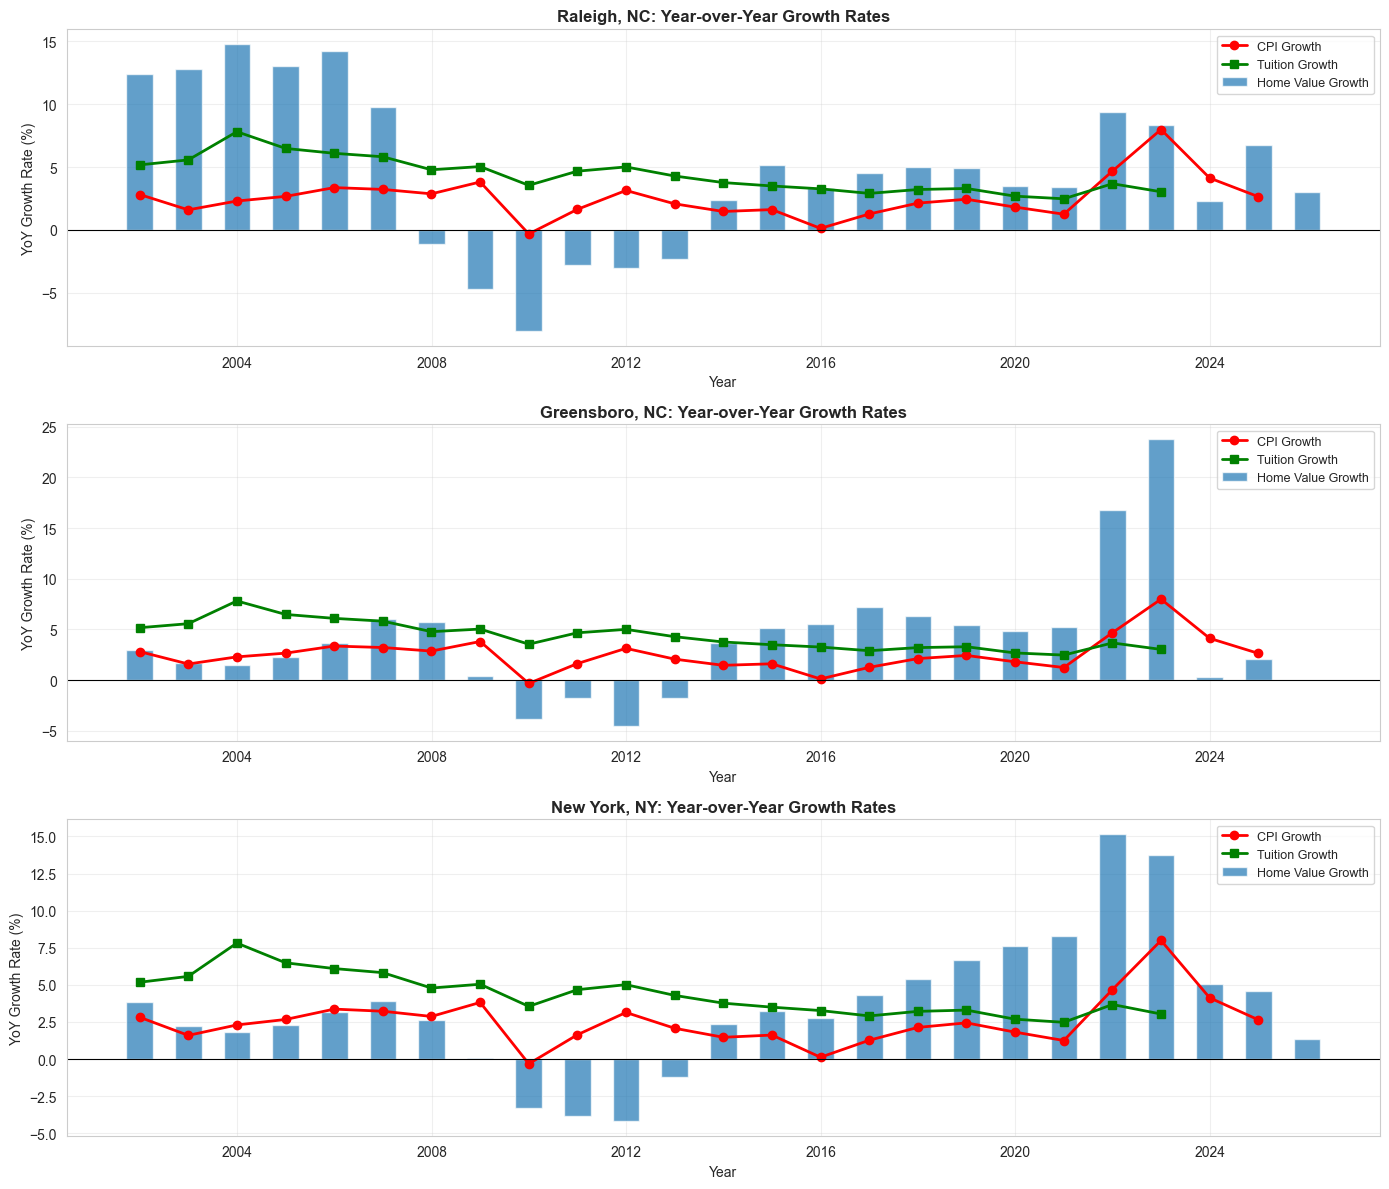


Average Year-over-Year Growth Rates:
                ZHVI Avg YoY (%)  CPI Avg YoY (%)  Tuition Avg YoY (%)
Raleigh, NC             4.679006         2.530354             4.369745
Greensboro, NC          3.960226         2.530354             4.369745
New York, NY            3.517289         2.530354             4.369745


In [179]:
# Calculate year-over-year growth rates
zhvi_yoy = zhvi.resample('YE').mean().pct_change() * 100
cpi_yoy = cpi.resample('YE').mean().pct_change() * 100
tuition_yoy = tuition.resample('YE').mean().pct_change() * 100

# Plot YoY growth for each market
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, market in enumerate(markets):
    ax = axes[idx]
    
    # Plot all YoY growth rates on same axis
    ax.bar(zhvi_yoy.index, zhvi_yoy[market], alpha=0.7, label='Home Value Growth', width=200)
    ax.plot(cpi_yoy.index, cpi_yoy['CPI'], color='red', linewidth=2, 
            marker='o', label='CPI Growth')
    ax.plot(tuition_yoy.index, tuition_yoy['Tuition_and_Fees'], color='green', linewidth=2, 
            marker='s', label='Tuition Growth')
    
    ax.set_title(f'{market}: Year-over-Year Growth Rates', fontsize=12, fontweight='bold')
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('YoY Growth Rate (%)', fontsize=10)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()

# Calculate average YoY growth rates
avg_growth = pd.DataFrame({
    'ZHVI Avg YoY (%)': zhvi_yoy.mean(),
    'CPI Avg YoY (%)': cpi_yoy['CPI'].mean(),
    'Tuition Avg YoY (%)': tuition_yoy['Tuition_and_Fees'].mean()
})

print("\nAverage Year-over-Year Growth Rates:")
print(avg_growth)

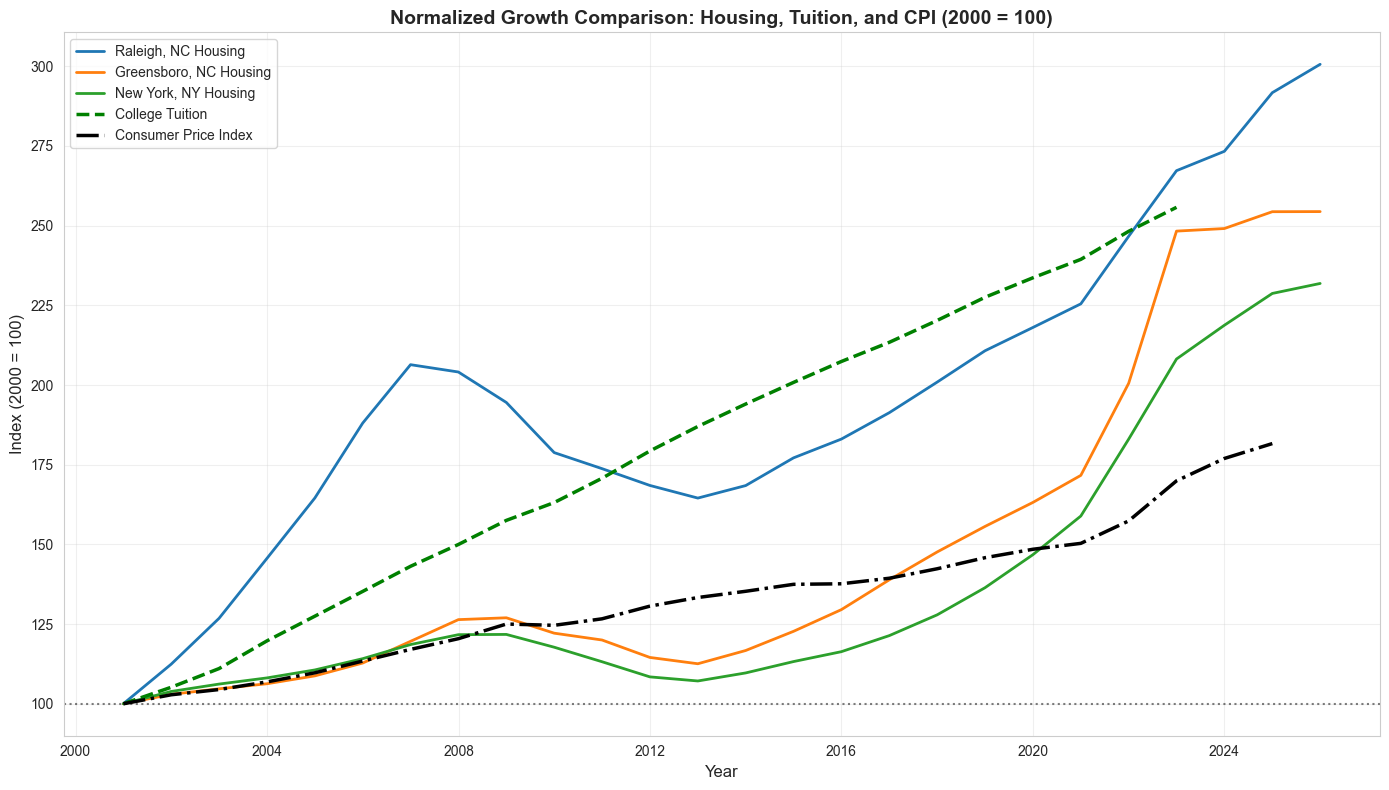

In [180]:
# Normalize all datasets to 2000 baseline (index = 100)
# Resample housing data to annual for comparison
zhvi_annual_full = zhvi.resample('YE').mean()

# Find earliest common year
base_year = '2000-12-31'

# Normalize each dataset
zhvi_normalized = (zhvi_annual_full / zhvi_annual_full.loc[base_year]) * 100
tuition_annual = tuition.resample('YE').mean()
tuition_normalized = (tuition_annual / tuition_annual.loc[tuition_annual.index[0]]) * 100

# Normalize CPI
cpi_annual = cpi.resample('YE').mean()
cpi_normalized = (cpi_annual / cpi_annual.iloc[0].values[0]) * 100

# Create comprehensive comparison plot
plt.figure(figsize=(14, 8))

# Plot housing markets
for market in markets:
    plt.plot(zhvi_normalized.index, zhvi_normalized[market], label=f'{market} Housing', linewidth=2)

# Plot tuition
plt.plot(tuition_normalized.index, tuition_normalized['Tuition_and_Fees'], 
         label='College Tuition', linewidth=2.5, linestyle='--', color='green')

# Plot CPI
plt.plot(cpi_normalized.index, cpi_normalized['CPI'], 
         label='Consumer Price Index', linewidth=2.5, linestyle='-.', color='black')

plt.title('Normalized Growth Comparison: Housing, Tuition, and CPI (2000 = 100)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2000 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(y=100, color='black', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

### Real vs. Nominal Growth (Inflation-Adjusted Analysis)

Adjusting home values for inflation using CPI reveals real purchasing power changes versus nominal price increases.

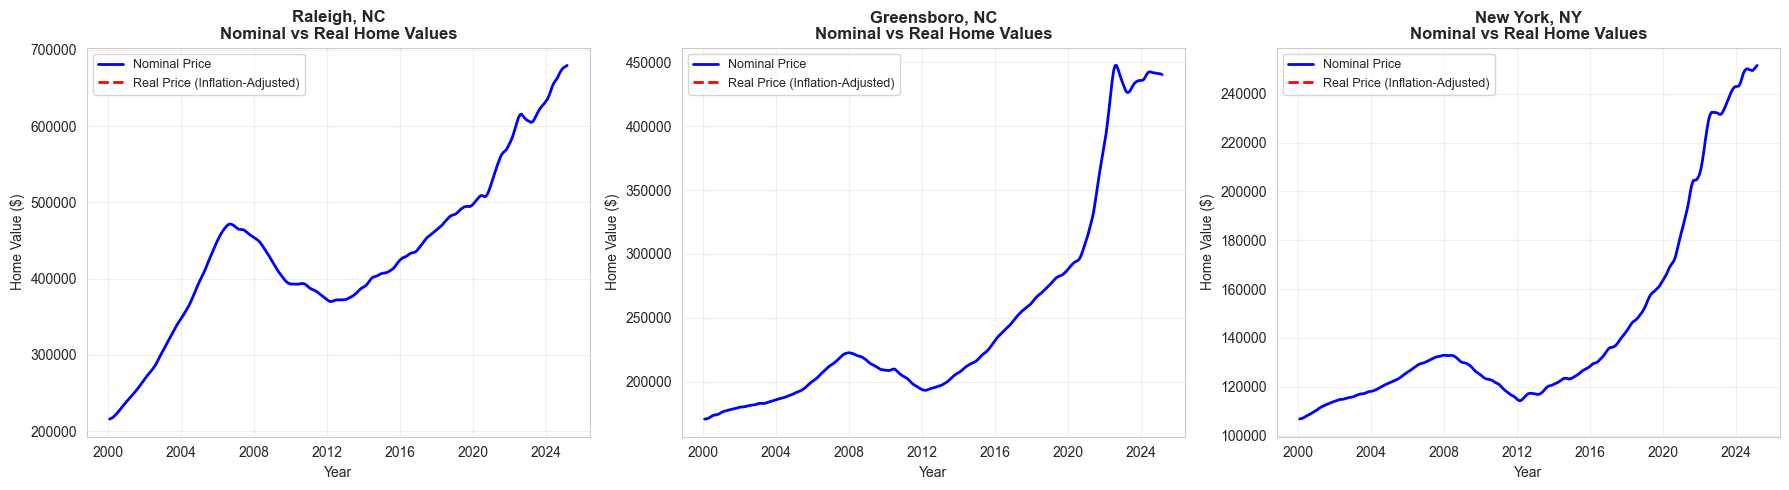

In [181]:
# Calculate real (inflation-adjusted) home values
# Using CPI to adjust ZHVI to constant dollars (base year = first year in dataset)
base_cpi = cpi.iloc[0, 0]  # First CPI value as base
zhvi_real = zhvi.copy()

for market in markets:
    # Align CPI with ZHVI dates
    zhvi_real[market] = (zhvi[market] / cpi['CPI']) * base_cpi

# Plot Nominal vs Real Home Values for each market
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, market in enumerate(markets):
    ax = axes[idx]
    ax.plot(zhvi.index, zhvi[market], label='Nominal Price', linewidth=2, color='blue')
    ax.plot(zhvi_real.index, zhvi_real[market], label='Real Price (Inflation-Adjusted)', 
            linewidth=2, color='red', linestyle='--')
    ax.set_title(f'{market}\nNominal vs Real Home Values', fontsize=12, fontweight='bold')
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Home Value ($)', fontsize=10)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Divergence from CPI (Affordability Crisis Analysis)

Measuring how much home values and tuition have diverged from general inflation quantifies the affordability crisis.

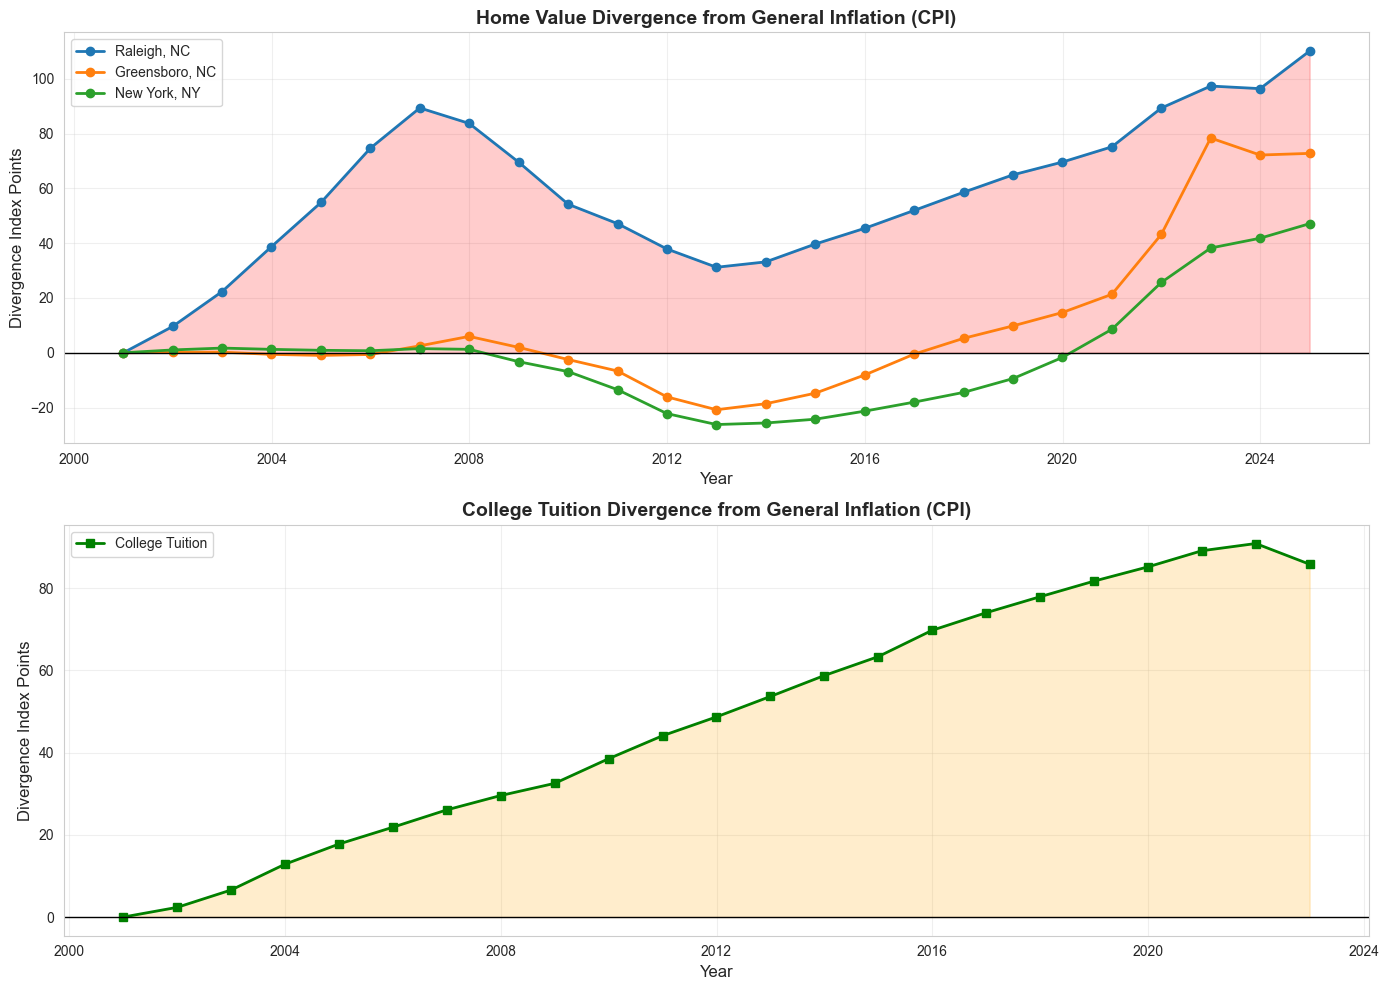

In [182]:
# Calculate divergence: normalized home values minus normalized CPI
# This shows how much housing has outpaced general inflation
divergence_zhvi = zhvi_normalized.copy()
for market in markets:
    divergence_zhvi[market] = zhvi_normalized[market] - cpi_normalized['CPI']

# Calculate divergence for tuition
divergence_tuition = tuition_normalized['Tuition_and_Fees'] - cpi_normalized['CPI']

# Plot divergence from CPI
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Home value divergence
ax1 = axes[0]
for market in markets:
    ax1.plot(divergence_zhvi.index, divergence_zhvi[market], 
             label=market, linewidth=2, marker='o')

ax1.set_title('Home Value Divergence from General Inflation (CPI)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Divergence Index Points', fontsize=12)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.fill_between(divergence_zhvi.index, 0, divergence_zhvi.max(axis=1), 
                 alpha=0.2, color='red')

# Tuition divergence
ax2 = axes[1]
ax2.plot(divergence_tuition.index, divergence_tuition.values, 
         color='green', linewidth=2, marker='s', label='College Tuition')
ax2.set_title('College Tuition Divergence from General Inflation (CPI)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Divergence Index Points', fontsize=12)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.fill_between(divergence_tuition.index, 0, divergence_tuition.values, 
                 alpha=0.2, color='orange')

plt.tight_layout()
plt.show()

## Summary of Observations

### Question A: How do the 3 housing markets compare?

**What the numbers show:**
- New York has the most expensive housing market at around $700K currently
- Surprisingly, NYC had the slowest growth at only 182% 
- Raleigh and Greensboro both started around $150K in 2000
- Raleigh really took off with 311% growth vs Greensboro's 249%
- Makes sense given all the tech development and growth in Raleigh over the years

**Patterns across all three markets:**
- The 2008 crash shows up clearly in all three with a visible dip
- Recovery started around 2012 for all markets
- All three basically exploded after 2020 - pandemic effect probably
- Very few outliers since the data is smoothed
- Seasonal patterns are pretty consistent across markets

**Why I picked New York:**
- Wanted to see how a mega-city compares to growing NC metros
- NYC has completely different dynamics - limited space, high demand, global city
- Raleigh and Greensboro have room to expand and are driven by regional growth
- Fascinating that despite huge differences in scale, they all show similar crisis/recovery patterns
- Just at wildly different price points

### Question B: How does college tuition compare with housing markets?

- College tuition increased about 135% over this period
- Falls between New York housing (182%) and NC housing (249-311%)
- Tuition increases were remarkably steady - no volatility
- No dip in 2008 unlike housing - colleges just kept raising prices
- Tuition and housing tracked closely until 2012, then NC housing pulled ahead
- Both way outpaced CPI (82%) - explains why everything feels unaffordable
- The divergence from CPI shows a real affordability crisis in both housing and education

### Question C: How do rental markets compare with home prices?

**Rental market observations:**
- New York rents around $3,500/month - more than triple Greensboro ($1,100) and Raleigh ($1,400)
- Rental data only goes back to 2015 but still shows clear patterns
- Rents have been much more stable than home prices
- While home values bounced around (especially pandemic era), rents climbed steadily

**Home prices vs rents:**
- Price-to-rent ratios increased across all markets
- Getting harder to justify buying vs renting based on the numbers
- 2020-2025: home prices spiked dramatically while rents increased moderately
- Suggests a lot of the home price surge was speculation and competition, not fundamentals

### Question D: How does CPI compare with housing markets?

**The big picture:**
- CPI went up 82% from 2000 to 2024 - seems reasonable over 24 years
- Housing grew 182-311% depending on market - way more than inflation
- Normalized plots make it super clear - housing costs just keep pulling away from CPI
- Even inflation-adjusted home values increased 100-230%
- This means housing genuinely became more expensive, not just inflated dollars

**Key differences:**
- 2008 crisis barely registers in CPI data but huge dip in housing
- Post-2020, both accelerated but housing was 2-4x faster than CPI
- This explains why housing feels so unaffordable - it's not just general inflation
- Housing specifically has gotten way more expensive relative to everything else

## Reflection

### What I Learned About Working with Data:

**Getting the data into shape:**
- Real-world data is messier than I expected
- Had to work with different file formats (CSV and TSV)
- Zillow data came with cities as rows and dates as columns - completely backwards
- Spent a lot of time transposing and aligning everything correctly
- Different datasets had different time ranges (housing 2000-2025, rentals 2015-2025)
- The `dropna()` function is great for handling missing values

**Analysis techniques that worked:**
- `pct_change()` was super useful for comparing datasets on different scales
- Normalizing to a base year (2000 = 100) made relative growth way easier to see
- Resampling monthly data to annual was key for fair comparisons
- Learned that sometimes you need to transform data multiple ways to see patterns

**Making good visualizations:**
- Created different plot types - line charts, dual-axis plots, normalized growth charts
- Normalized plots helped me spot patterns I would've missed otherwise
- Learned that less is more - early attempts were too cluttered
- Too many lines and colors just confuses things

### Challenges I Ran Into:

**Matching up different datasets:**
- Everything had different time periods and frequencies - major headache
- Housing was monthly 2000-2025, rentals monthly 2015-2025, tuition was annual
- Getting all that to align properly took trial and error
- Mismatched indices were a constant problem until I got resampling right

**Data structure issues:**
- Zillow files structured weirdly for analysis
- Had to figure out metadata columns vs actual data columns
- Transposing took a few tries to get right
- Wide format data is annoying to work with

**Making fair comparisons:**
- Can't just plot home prices (hundreds of thousands) with CPI (index numbers) together
- Needed normalization and percent changes for meaningful comparisons
- Different scales require different approaches

### What Didn't Work at First:

- Got weird results calculating percent changes without thinking about monthly vs annual
- Didn't realize I needed to annualize monthly data at first
- Kept getting mismatched indices when merging datasets
- First plots were way too cluttered and hard to read
- Had to learn to use subplots and be more selective
- Discovered high correlations can be misleading when both variables just trend upward
- Good lesson in thinking critically about what numbers actually mean

### What I'll Remember:

- Data prep takes way longer than actual analysis
- Good visualizations tell the story better than pages of numbers
- Normalized growth plot showing housing pulling away from CPI was way more impactful than just percentages
- Knowing how CPI is calculated or what ZHVI measures matters for correct interpretation